1.Mounting Drive to fetch the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.Navigating to the file and loading it.

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/water_potability.csv'
df = pd.read_csv(file_path)

3.Checking for Missing values...

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


4.Handling missing values with the average of that specific column.

In [ ]:
df['ph'] = df['ph'].fillna(value=df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean())

5.Feature Scaling : Using Standard Scaling, This step prevents the ML model for being baised towards the features/columns with larger magnitudes/values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Dropping the target column to select only the numerical features
numerical_cols = df.drop(columns=['Potability']).columns

# Instantiating the scaler
scaler = StandardScaler()

# Fitting and transforming the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now checking the scaled data to see the effect
print(df.head())

             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.180651         1.306149  -1.286298           0  
1        0.270597        -0.638480   0.684218           0  
2        0.781117         0.001509  -1.167365           0  
3        1.255134         2.152874   0.848412           0  
4       -0.824357        -2.181599   0.138786           0  


6.Verifing if the dataset is cleaned and preprocessed for the model to be trained upon.

In [ ]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


7.Verifing the Table of Preprocessed dataset.

In [ ]:
print("Some Sample Rows of the preprocessed dataset:")
print(df.sample(5))

Some Sample Rows of the preprocessed dataset:
            ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
491  -0.367269 -0.024414  0.867138    -0.008623 -1.321976e-01      1.294299   
2507 -0.127060 -0.784742 -0.517680    -1.217741  8.172483e-01      2.665219   
2763 -0.490813  0.359958  0.152053     1.186548  3.145987e-15     -1.108991   
1401  0.363850  0.258572 -1.552463    -0.701245  2.339249e+00     -1.423384   
148   1.734923 -1.323419  0.185647    -0.124188 -1.736329e-02     -0.111841   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
491        -0.721227         0.110681  -2.064498           0  
2507        0.876212        -1.615967   0.771608           0  
2763       -0.033578         0.000000  -0.423307           1  
1401       -0.466385         0.056194   0.354172           0  
148         0.721119         1.496833   1.221773           0  


8.Splitting the data into training(80%) and tests(20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new datasets to confirm the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (2620, 9)
Shape of X_test: (656, 9)


In [ ]:
!pip install imbalanced-learn

Resampling with SMOTE. Fixing Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution before SMOTE: Potability
0    1586
1    1034
Name: count, dtype: int64
Class distribution after SMOTE: Potability
0    1586
1    1586
Name: count, dtype: int64


9.Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression(random_state=42)

# Retrain the model using the resampled data
model.fit(X_train_resampled, y_train_resampled)

print("Model training on resampled data is complete.")

Model training on resampled data is complete.


10.Testing the model

In [ ]:
y_pred = model.predict(X_test)

11.Evaluating the model

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report to see key metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       412
           1       0.37      0.49      0.42       244

    accuracy                           0.50       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.50      0.51       656



12. Exploring another model for better accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

12.1. Making Predictions and evalutating the RF model.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       412
           1       0.55      0.49      0.52       244

    accuracy                           0.66       656
   macro avg       0.63      0.62      0.63       656
weighted avg       0.65      0.66      0.65       656



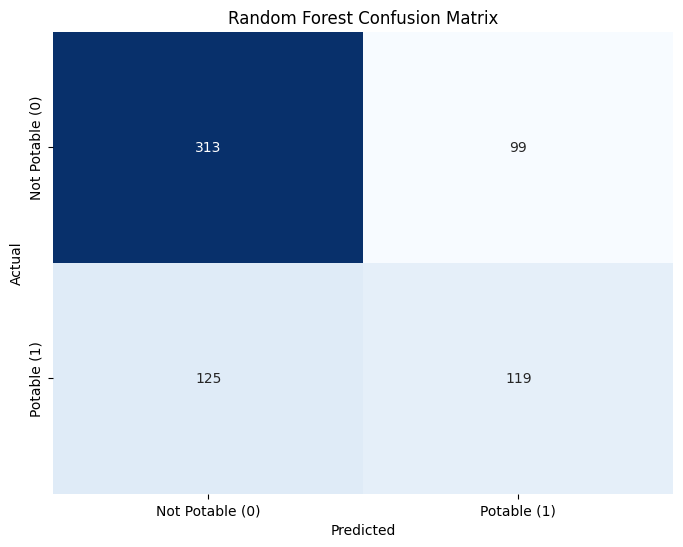

In [ ]:
# Make predictions on the test set using the new Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable (0)', 'Potable (1)'],
            yticklabels=['Not Potable (0)', 'Potable (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

13. Fine Tuning the model with HyperParameter Tuning with GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model_rf_tuned = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model_rf_tuned,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best model found by grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found:  {'max_depth': 30, 'n_estimators': 200}
Best cross-validation score:  0.7408763257905064
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       412
           1       0.56      0.49      0.52       244

    accuracy                           0.67       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.66      0.67      0.66       656



14.Feature Importance : it explains which water quality parameters were most important in determining if the water was potable or not.

/tmp/ipython-input-440288347.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


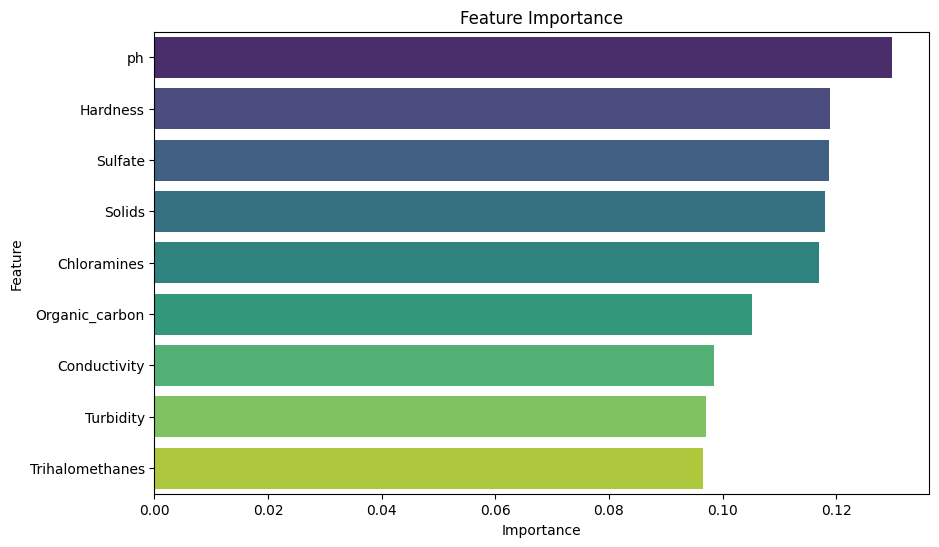

Feature Importance:
           feature  importance
0               ph    0.129924
1         Hardness    0.118940
4          Sulfate    0.118661
2           Solids    0.117958
3      Chloramines    0.117056
6   Organic_carbon    0.105220
5     Conductivity    0.098574
8        Turbidity    0.097107
7  Trihalomethanes    0.096559


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best model
importances = grid_search.best_estimator_.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the sorted feature importance
print("Feature Importance:")
print(feature_importance_df)

15. WebApp Implementation and Deployment.

In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


16. Downloading the Processed and Splitted Data.

In [ ]:
# Save the resampled training features to a CSV file
X_train_resampled.to_csv('X_train_resampled.csv', index=False)

# Save the resampled training labels to a CSV file
y_train_resampled.to_csv('y_train_resampled.csv', index=False)

# Save the testing features to a CSV file
X_test.to_csv('X_test.csv', index=False)

# Save the testing labels to a CSV file
y_test.to_csv('y_test.csv', index=False)